In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install pmdarima

## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn import preprocessing
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 10, 5
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

## **Uploading Data**

In [ ]:
stock_data = pd.read_csv('/content/AAPL.csv')
stock_data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [ ]:
stock_data.isnull().sum()

,0
Unnamed: 0,0
symbol,0
date,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0


No null or missing data

In [ ]:
df = stock_data[['date','close']]

In [ ]:
df.head()

,date,close
0,2015-05-27 00:00:00+00:00,132.045
1,2015-05-28 00:00:00+00:00,131.780
2,2015-05-29 00:00:00+00:00,130.280
3,2015-06-01 00:00:00+00:00,130.535
4,2015-06-02 00:00:00+00:00,129.960


In [ ]:
df['date'] = df['date'].astype("string")

<ipython-input-14-242a8133f17a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].astype("string")


In [ ]:
df['date'] = df['date'].str[0:11]

<ipython-input-15-ec5b71888ff6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].str[0:11]


In [ ]:
df['date'] = pd.to_datetime(df['date'])

<ipython-input-16-e8d2d516eb0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
df.set_index('date',drop=True,inplace=True)

In [ ]:
df2= df.copy()

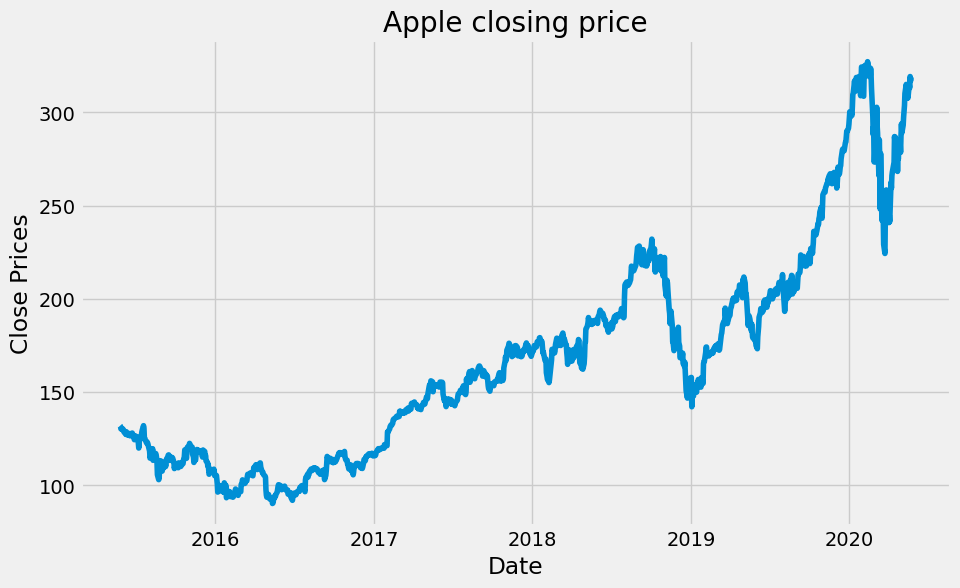

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['close'])
plt.title('Apple closing price')
plt.show()

# Arima Model

In [ ]:
# use the dickey-fuller test to check the stationarity in the time series
def test_stationarity(df2):
    adf = adfuller(df2)
    print('ADF Statistic: {}'.format(adf[0]))
    print('p-value: {}'.format(adf[1]))

    # If the p-value is less than 0.05, the data is stationary
    if adf[1] < 0.05:
      print('The data is stationary')
    else:
      print('The data is not stationary')

In [ ]:
test_stationarity(df2)

ADF Statistic: -0.10012966467734342
p-value: 0.9494256168598446
The data is not stationary


<Figure size 1000x500 with 0 Axes>

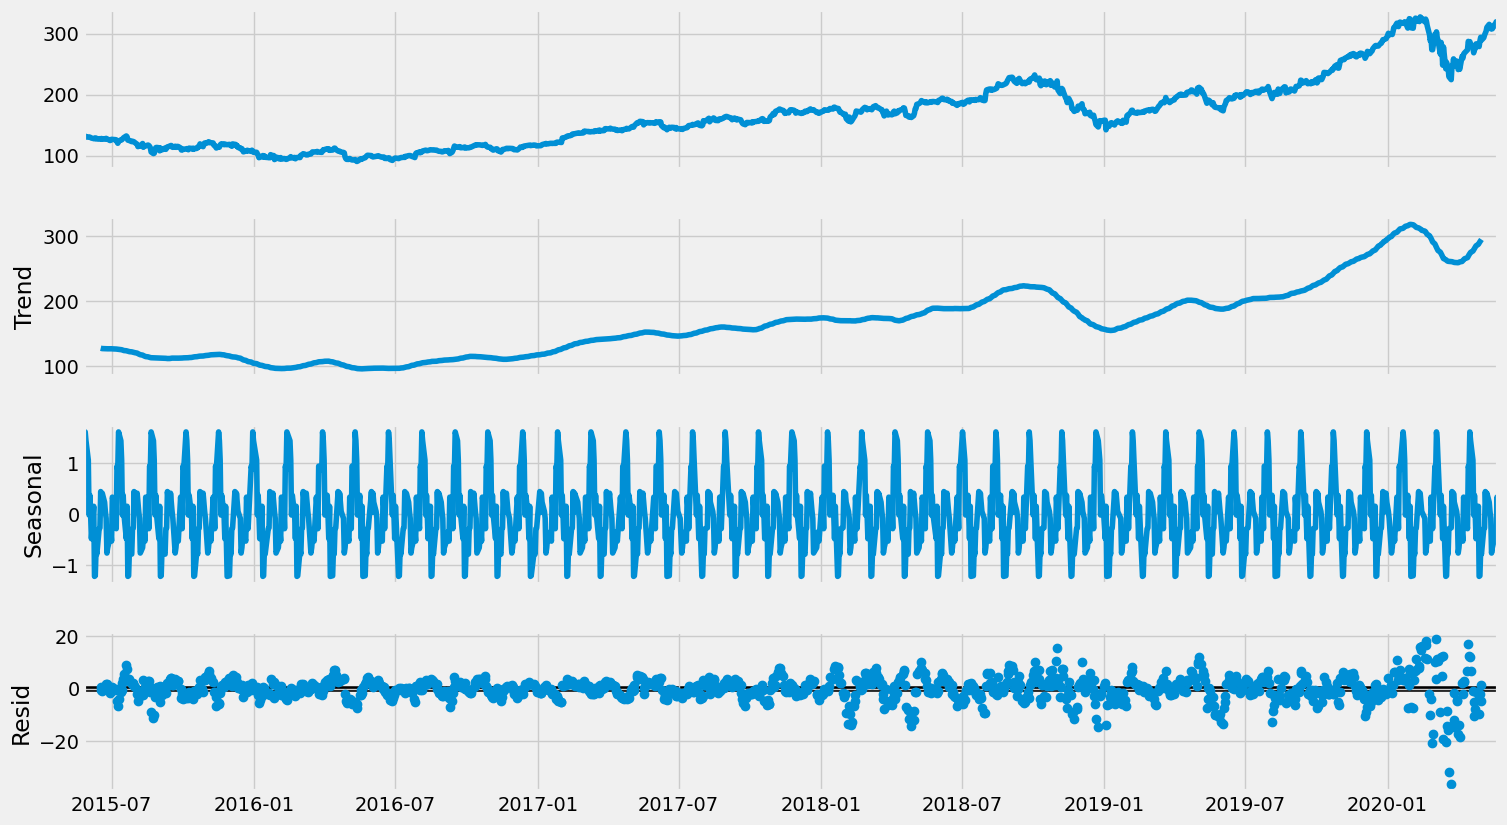

In [ ]:
#To separate the trend and the seasonality from a time series,
# we can decompose the time series .
result =  sm.tsa.seasonal_decompose(df2, period=30 ,model='additive')                                                    #fill code
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

In [ ]:
df_log = np.log(df2)
df_log

,close
date,
2015-05-27,4.883143
2015-05-28,4.881134
2015-05-29,4.869686
2015-06-01,4.871641
2015-06-02,4.867227
...,...
2020-05-18,5.752446
2020-05-19,5.746650
2020-05-20,5.765912


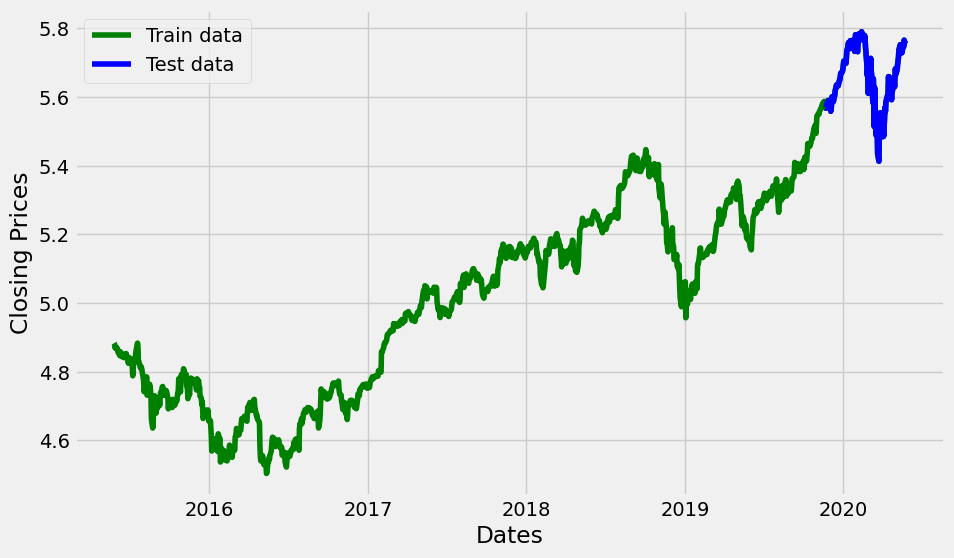

In [ ]:
ar_train_data, ar_test_data = df_log[:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):] #applying log transform for better correlation
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(ar_test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6172.666, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6170.895, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6170.912, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6172.976, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6168.751, Time=1.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.313 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1132
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3087.488
Date:                Sun, 17 Nov 2024   AIC                          -6172.976
Time:                        03:27:41   BIC                          -6167.945
Sample:                             0   HQIC                         -6171.075
                               - 1132                                  

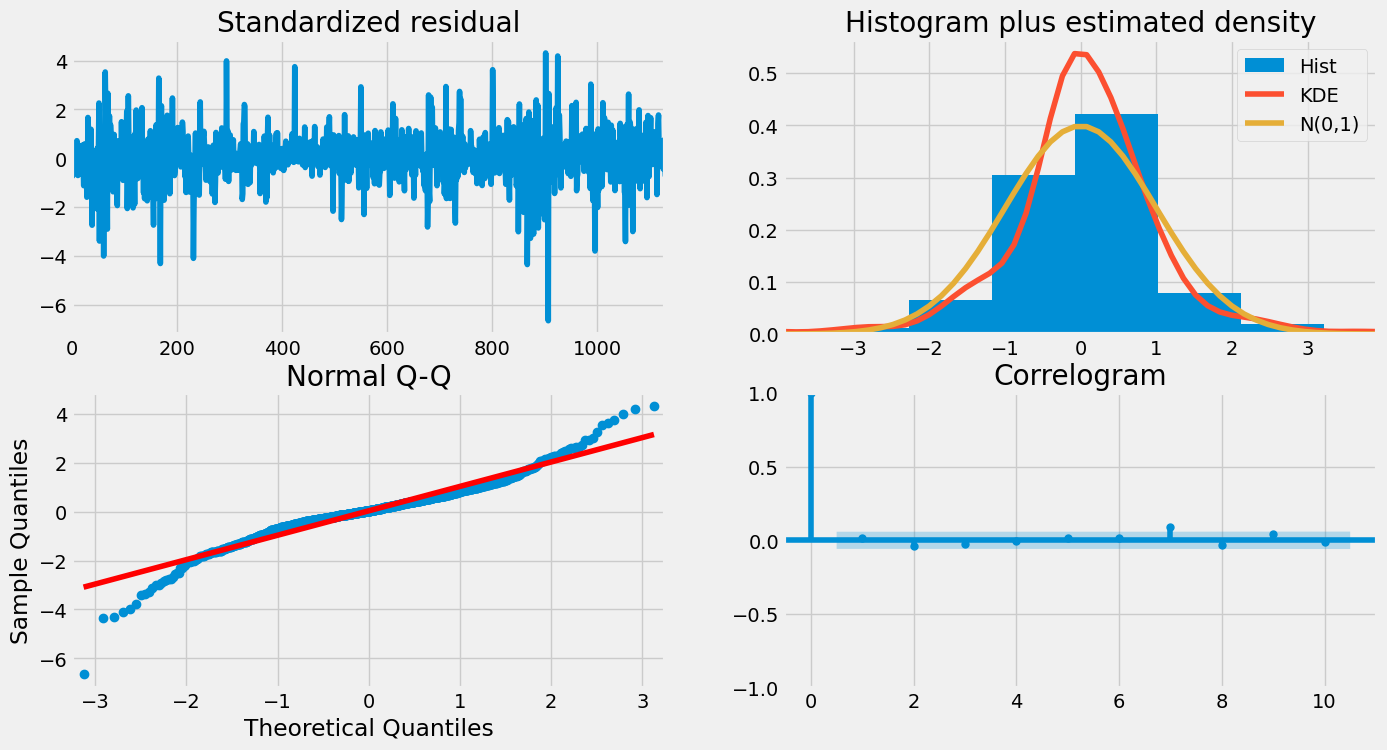

In [ ]:
model_autoARIMA = auto_arima(ar_train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
model=ARIMA(ar_train_data,order=(0,1,0))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
fc = model_fit.forecast(ar_test_data.shape[0],alpha=0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
fc=pd.DataFrame(fc)

In [ ]:
fc['date'] = ar_test_data.index
fc.set_index('date', drop=True, inplace=True)

In [ ]:
fc

,predicted_mean
date,
2019-11-21,5.572876
2019-11-22,5.572876
2019-11-25,5.572876
2019-11-26,5.572876
2019-11-27,5.572876
...,...
2020-05-18,5.572876
2020-05-19,5.572876
2020-05-20,5.572876


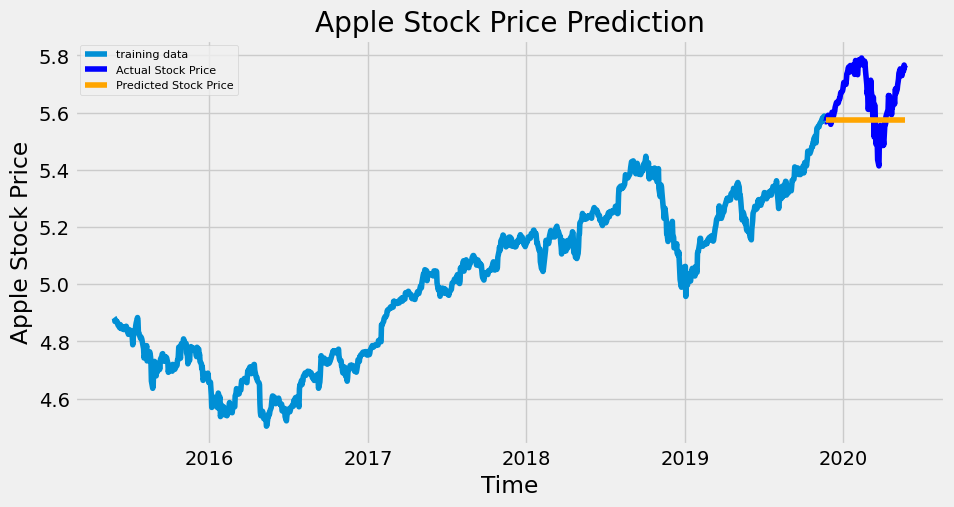

In [ ]:
# Make as pandas series
plt.figure(figsize=(10,5), dpi=100)
plt.plot(ar_train_data, label='training data')
plt.plot(ar_test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc, color = 'orange',label='Predicted Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
fc2 = np.exp(fc)
ar_test_data2 = np.exp(ar_test_data)

In [ ]:
fc2

,predicted_mean
date,
2019-11-21,263.19
2019-11-22,263.19
2019-11-25,263.19
2019-11-26,263.19
2019-11-27,263.19
...,...
2020-05-18,263.19
2020-05-19,263.19
2020-05-20,263.19


In [ ]:
mse = mean_squared_error(ar_test_data2, fc2)
print('MSE: '+str(mse))
mae = mean_absolute_error(ar_test_data2, fc2)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(ar_test_data2, fc2))
print('RMSE: '+str(rmse))

MSE: 1248.5619428571424
MAE: 29.53650793650793
RMSE: 35.33499600760049


## Data Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)

<ipython-input-35-083a2e8d6719>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns] = scaler.fit_transform(df)


In [ ]:
train_size=int(len(df)*0.7)

In [ ]:
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
train_data

,close
date,
2015-05-27,0.176074
2015-05-28,0.174956
2015-05-29,0.168623
2015-06-01,0.169699
2015-06-02,0.167272
...,...
2018-11-13,0.430170
2018-11-14,0.407245
2018-11-15,0.426708


## LSTM Modeling

In [ ]:
#function to create the x,y data set for the time series model
def create_data(data, timestep):
    xdata=[]
    ydata=[]
    for i in range(len(data)-timestep-1):
        a=data['close'][i:i+timestep]
        xdata.append(a)
        ydata.append(data['close'][i+timestep])
    return np.array(xdata), np.array(ydata)

In [ ]:
timestep = 100
x_train,y_train = create_data(train_data, timestep)
x_test,y_test = create_data(test_data, timestep)

<ipython-input-39-47dfd5b19b2f>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ydata.append(data['close'][i+timestep])


In [ ]:
x_train.shape

(779, 100)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 678ms/step - loss: 0.0252 - val_loss: 0.0541
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 0.0035 - val_loss: 0.0096
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 7.1393e-04 - val_loss: 0.0048
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 7.9453e-04 - val_loss: 0.0049
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - loss: 6.7325e-04 - val_loss: 0.0049
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 6.8849e-04 - val_loss: 0.0063
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 6.5410e-04 - val_loss: 0.0067
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - loss: 6.8688e-04 - val_loss: 0.0059
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - loss: 6.8521e-04 - val_loss: 0.0055
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step - loss: 6.4834e-04 - val_loss: 0.0055
Epoch 12

In [ ]:
test_predicted = model.predict(x_test)
train_predicted = model.predict(x_train)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [ ]:
test_inverse_predicted = scaler.inverse_transform(test_predicted)

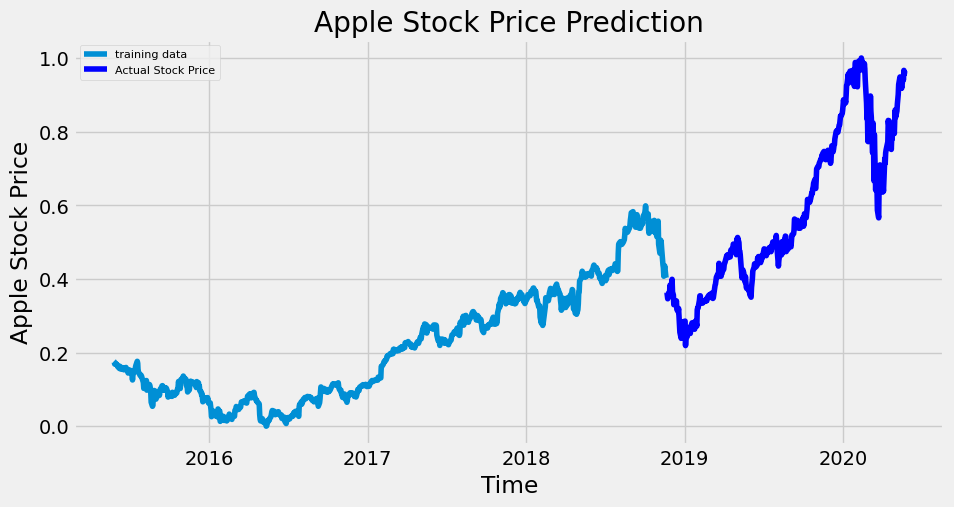

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
#plt.plot(fc, color = 'orange',label='Predicted Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
y_test = y_test.reshape(y_test.shape[0],1)
y_train= y_train.reshape(y_train.shape[0],1)

In [ ]:
train_data = scaler.inverse_transform(train_data)


In [ ]:
train_data = pd.DataFrame(train_data)

In [ ]:
test_inverse_predicted = scaler.inverse_transform(test_predicted)

In [ ]:
test_inverse_predicted = scaler.inverse_transform(test_predicted)
train_inverse_predicted = scaler.inverse_transform(train_predicted)
y_test_inverse = scaler.inverse_transform(y_test)
y_train_inverse = scaler.inverse_transform(y_train)

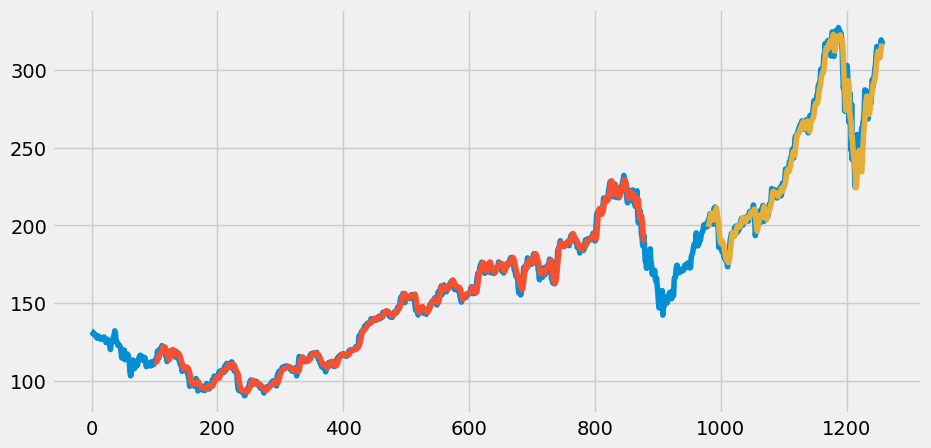

In [ ]:
plt.plot(scaler.inverse_transform(df))
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_inverse_predicted)+look_back, :] = train_inverse_predicted
plt.plot(trainPredictPlot)
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_inverse_predicted)+(look_back*2)+1:len(df)-1, :] = test_inverse_predicted
plt.plot(testPredictPlot)

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test_inverse,test_inverse_predicted))
print('RMSE: '+str(rmse))

RMSE: 6.806799163885033
